# Lab 1: Gradient descent
Author : Pierre Ablin

In this lab, the goal is to implement gradient descent, and look at its behavior. We will implement it for the ridge regression.


In the following, `X` is a $n\times p$ matrix and $y$ a vector of size `n`.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
p = 500
X = np.random.randn(n, p)
y = np.random.randn(n)
w = np.random.randn(p)
lbda = 0.5

**Exercise 1**: Implement an algorithm that computes the value of the ridge regression function, and of its gradient. Verify by finite difference that it is correct.

$$\min_w \frac12\|Xw - y\|^2 + \frac\lambda 2\|w\|^2$$

In [30]:
def ridge_cost(w, X, y, lbda):
    # your code here
    r = np.dot(X, w) - y
    cost = 0.5 * np.dot(r, r) + lbda * 0.5 * np.dot(w, w)
    return cost


def ridge_gradient(w, X, y, lbda):
    # your code here
    grad = np.dot(X.T, np.dot(X, w) - y) + lbda * w
    return grad

In [31]:
from scipy.optimize import check_grad

check_grad(ridge_cost, ridge_gradient, w, X, y, lbda)  # should be small ! :)

0.004136920838665486

**Exercise 2**: Implement an algorithm that computes the optimal value $w^*$ in closed form. Check that it works: it should cancel the gradient !

In [32]:
def ridge_closed_form(X, y, lbda):
    n, p = X.shape
    # Your code here
    v = np.dot(X.T, y)
    M = np.dot(X.T, X) + lbda * np.eye(p)
    w = np.linalg.solve(M, v)
    return w

In [33]:
w_star = ridge_closed_form(X, y, lbda)
print(ridge_gradient(w_star, X, y, lbda))  # should be small

[-6.01949046e-16 -6.21833314e-15  7.77676534e-15  1.25767452e-15
  1.00613962e-15 -1.26114397e-15 -1.36782946e-15 -4.37844205e-15
 -6.87731122e-15 -1.41137102e-14 -1.20754101e-14  1.48492330e-14
  9.87578075e-15 -1.80307158e-14  1.13268769e-14  1.92554306e-16
  9.18861341e-16  2.42167397e-15 -5.52509427e-15  5.83300769e-15
 -9.78557513e-15  4.22058222e-15 -2.64198385e-15 -3.80121282e-15
 -5.06192310e-15  7.70921955e-15  3.95516953e-16  1.96630906e-15
  3.35495520e-15  3.57699981e-15 -1.42099874e-14 -4.27761125e-15
 -2.25514052e-17  1.98755942e-15  5.26228366e-15  1.29367003e-15
 -1.17787724e-14  1.20407156e-14  4.58530783e-15  1.10501885e-14
 -5.72523799e-15  1.11039650e-14 -2.68135395e-15  2.15973073e-14
  7.30730580e-15 -2.90566182e-15  5.05498421e-15  1.95676808e-15
  7.27369553e-15  1.56402669e-14  1.41857012e-15 -6.48352899e-15
 -8.49103773e-15 -1.83360271e-15 -1.03519623e-15  3.28209682e-15
  6.61103117e-15  1.78572435e-14  1.20146948e-14 -7.61196661e-15
 -1.42247325e-15  1.22853

**Exercise 3** Implement gradient descent with a step size `step` for `n_iters` iterations, starting from $w^0=0$.  Display the evolution of $f(x_n) - f^*$ and $\|x_n - x^*\|$ for this problem, with 100 iterations and the classical step size $1/L$.

In [34]:
def ridge_gradient_descent(X, y, lbda, step, n_iters):
    n, p = X.shape
    w = np.zeros(p)
    w_list = []
    for i in range(n_iters):
        w_list.append(w.copy())
        # your code here
        w = w - step * ridge_gradient(w, X, y, lbda)
    return w, w_list  # returns the value of w and the list of iterates

In [38]:
step = 1 / (np.max(np.linalg.svd(X)[1]) ** 2 + lbda)
n_iters = 100
w, w_list = ridge_gradient_descent(X, y, lbda, step, n_iters)

Text(0, 0.5, 'f - f^*')

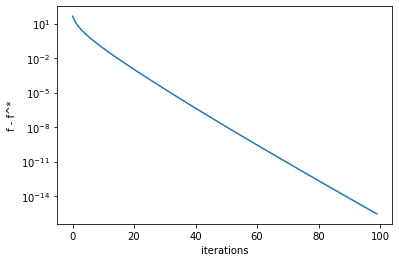

In [39]:
f_star = ridge_cost(w_star, X, y, lbda)
f_vals = [ridge_cost(w, X, y, lbda) - f_star for w in w_list]

plt.semilogy(f_vals)
plt.xlabel('iterations')
plt.ylabel('f - f^*')

Text(0, 0.5, '||x - x^*||')

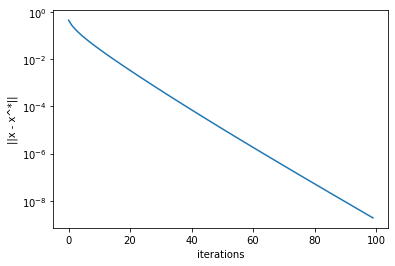

In [40]:
dists = [np.linalg.norm(w - w_star) for w in w_list]

plt.semilogy(dists)
plt.xlabel('iterations')
plt.ylabel('||x - x^*||')

**Exercice 4** Give the formula for the conditioning of the problem. Write a function that computes the condition number given $X, y$ and $\lambda$. 

In [68]:
def conditioning(X, lbda):
    # your code here
    L = np.max(np.linalg.svd(X)[1]) ** 2 + lbda
    mu = np.min(np.linalg.svd(X)[1]) ** 2 + lbda
    kappa = mu / L
    return kappa

**Exercice 5** Generate a problem with $n=50$, $p=100$ where the conditioning is $~0.5$, and another problem where the conditioning is $~1 / 1000$. Compare the convergence curves on these problems.

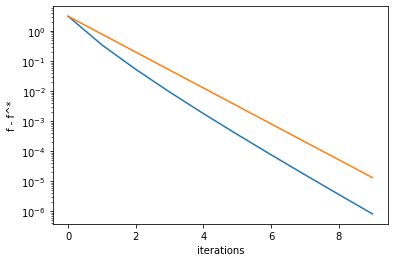

In [69]:
# Well conditioned problem
n, p = 50, 100

# your code here

X = np.random.randn(n, p)
y = np.random.randn(n)
lbda = 250

kappa = conditioning(X, lbda)


step = 1 / (np.max(np.linalg.svd(X)[1]) ** 2 + lbda)
n_iters = 10
w, w_list = ridge_gradient_descent(X, y, lbda, step, n_iters)

w_star = ridge_closed_form(X, y, lbda)

f_star = ridge_cost(w_star, X, y, lbda)
f_vals = [ridge_cost(w, X, y, lbda) - f_star for w in w_list]

plt.semilogy(f_vals)
plt.xlabel('iterations')
plt.ylabel('f - f^*')

plt.semilogy((1 - kappa) ** (2 * np.arange(n_iters)) * f_vals[0])

In order to get a very bad conditioning, we can generate a very badly conditioned matrix $X$ as $U\Sigma V$ where $U$, $V$ are random orthogonal matrices and $\Sigma$ is badly conditioned.

0.00010999890001100047


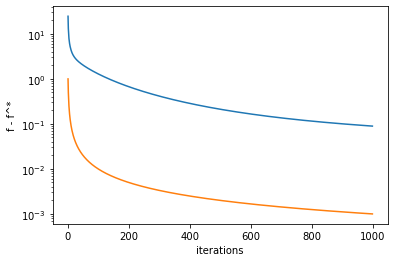

In [97]:
# Poorly conditioned problem
n, p = 50, 100

# your code here

A = np.random.randn(n, p)
U, _, V = np.linalg.svd(A, full_matrices=False)

sigma = np.diag(np.linspace(1/ 100, 1, n))
X = np.dot(U, np.dot(sigma, V))
y = np.random.randn(n)
lbda = 1e-5

kappa = conditioning(X, lbda)
print(kappa)

step = 1 / (np.max(np.linalg.svd(X)[1]) ** 2 + lbda)
n_iters = 1000
w, w_list = ridge_gradient_descent(X, y, lbda, step, n_iters)

w_star = ridge_closed_form(X, y, lbda)

f_star = ridge_cost(w_star, X, y, lbda)
f_vals = [ridge_cost(w, X, y, lbda) - f_star for w in w_list]

plt.semilogy(f_vals)
plt.xlabel('iterations')
plt.ylabel('f - f^*')

plt.semilogy(1 / (1 + np.arange(n_iters)))

Text(0, 0.5, '||x - x^*||')

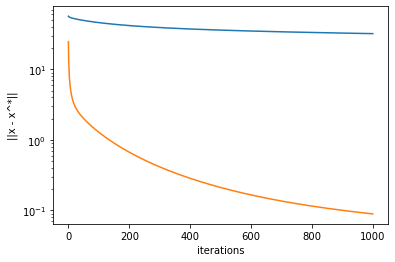

In [99]:
dists = [np.linalg.norm(w - w_star) for w in w_list]

plt.semilogy(dists)
plt.semilogy(f_vals)
plt.xlabel('iterations')
plt.ylabel('||x - x^*||')